In [52]:
from programming_for_biology.data_analysis.cell_polygons import read_disc, Coordinates
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import scipy
from scipy import stats

In [ ]:

#function to draw the wing disc
def draw_disc(cpx, cpy, area, size):
    #input arguments: 
    ## cpx, cpy: x,y/positions of the vertices of all cells 
	# format: list (1 element per cell) of sublists (1 number per vertex, eg 3 numbers for a triangle). 
    ## area: cell area
	# format: 1-dimentsional numpy array (1 number per cell)
    ## size: 'large' for the large disc and 'small' for the small disc
    
    polygs = []
    for i in range(len(cpx)):
    	polyg = []
    	for j in range(len(cpx[i])):
    		polyg.append([cpx[i][j], cpy[i][j]])
    	polygs.append(Polygon(polyg))
    patches = PatchCollection(polygs)
    patches.set_cmap('jet')
    colors = 1 * area
    colors[colors>14] = 14 # color value for all the mitotic cells (area>14) is set to 14
    patches.set_array(np.array(colors)) #for colors

    fig = plt.figure()
    panel = fig.add_subplot(1,1,1)
    panel.add_collection(patches)
    color_bar = fig.colorbar(patches)
    color_bar.set_label('Cell area (um2)', rotation = 270, labelpad = 15)
    panel.set_xlim(-120, 110)
    panel.set_ylim(-85, 85)
    panel.set_aspect('equal')
    plt.title(size+' wing disc')
    plt.show()

In [56]:
disc = read_disc("wd-large")
areas = np.array([polygon.area() for polygon in disc.polygons])
distances = np.array([
    polygon.centroid().distance_to(Coordinates.center())
    for polygon in disc.polygons
])
half_distance = np.max(distances) / 2


p_fit = np.polyfit(distances, areas, 1)
print("slope:", p_fit[0])
print("intercept:", p_fit[1])

t_statistic, p_value = scipy.stats.ttest_ind(areas[distances <= half_distance], areas[distances > half_distance])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

slope: 0.010858185096558044
intercept: 3.21155990997509
t-statistic: -11.032177682807816
p-value: 4.680367606457902e-28


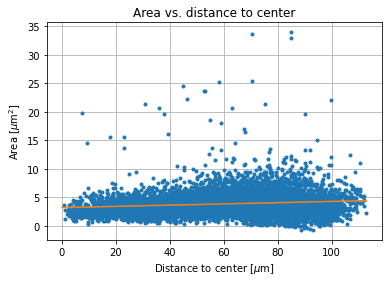

In [57]:
plt.title("Area vs. distance to center")
plt.plot(distances, areas, ".")
plt.xlabel("Distance to center [$\mu$m]")
plt.ylabel("Area [$\mu$m$^2$]")
plt.plot(np.linspace(0, max(distances), 100), np.polyval(p_fit, np.linspace(0, max(distances), 100)))
plt.grid()
plt.show()

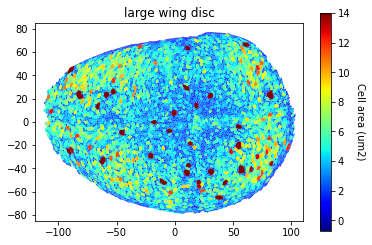

In [63]:
cpx = [[c.x for c in p.coordinates()] for p in disc.polygons]
cpy = [[c.y for c in p.coordinates()] for p in disc.polygons]
area = np.array([p.area() for p in disc.polygons])
draw_disc(cpx, cpy, area, 'large')

In [64]:
disc = read_disc("wd-small")
areas = np.array([polygon.area() for polygon in disc.polygons])
distances = np.array([
    polygon.centroid().distance_to(Coordinates.center())
    for polygon in disc.polygons
])
half_distance = np.max(distances) / 2


p_fit = np.polyfit(distances, areas, 1)
print("slope:", p_fit[0])
print("intercept:", p_fit[1])

t_statistic, p_value = scipy.stats.ttest_ind(areas[distances <= half_distance], areas[distances > half_distance])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

slope: -0.05616343784335852
intercept: 4.837544537680997
t-statistic: 1.5550916739106937
p-value: 0.12096808418350641


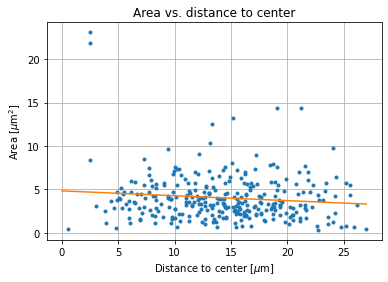

In [65]:
plt.title("Area vs. distance to center")
plt.plot(distances, areas, ".")
plt.xlabel("Distance to center [$\mu$m]")
plt.ylabel("Area [$\mu$m$^2$]")
plt.plot(np.linspace(0, max(distances), 100), np.polyval(p_fit, np.linspace(0, max(distances), 100)))
plt.grid()
plt.show()

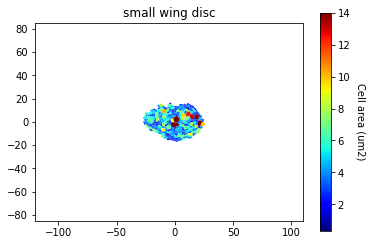

In [66]:
cpx = [[c.x for c in p.coordinates()] for p in disc.polygons]
cpy = [[c.y for c in p.coordinates()] for p in disc.polygons]
area = np.array([p.area() for p in disc.polygons])
draw_disc(cpx, cpy, area, 'small')